# Gaussian Discriminative Analysis

In [1]:
#Hanan Fared Mohamed Omara.
#id=20398559

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
import pandas as pd

In [3]:
data = pd.read_csv('binclassv2.txt',names= ["x1", "x2", "y"])
#Frame  = pd.DataFrame([data], columns =)

In [4]:
data.head()

x1    x2  y
0  20.0 -30.0  1
1  30.0 -30.0  1
2  40.0 -30.0  1
3  40.0 -20.0  1
4  40.0 -10.0  1

In [5]:
data.info

<bound method DataFrame.info of          x1       x2  y
0    20.000 -30.0000  1
1    30.000 -30.0000  1
2    40.000 -30.0000  1
3    40.000 -20.0000  1
4    40.000 -10.0000  1
..      ...      ... ..
395  21.634   6.6954 -1
396  17.663  12.9390 -1
397  16.566   1.6164 -1
398  13.930   9.1910 -1
399  21.882   9.3220 -1

[400 rows x 3 columns]>

In [6]:
data.value_counts()

x1       x2        y 
-11.243   15.8920   1    1
 19.331   6.4879   -1    1
 19.535   6.3484   -1    1
 19.529   7.8653   -1    1
 19.510   12.5320  -1    1
                        ..
 11.793   23.6780   1    1
 11.711   12.2340   1    1
 11.707   22.1210   1    1
 11.610   19.5290   1    1
 40.000  -10.0000   1    1
Length: 400, dtype: int64

As always we will split the data into training and testing sets

In [7]:
from sklearn.model_selection import  train_test_split

In [8]:
#by fixing the seed we guarantee that we can split the set in same way each time
#this maybe handy for debuging purposes
seed = 77678 
train_data, test_data  = train_test_split(data,test_size=0.30, random_state=seed)

In [9]:
train_data["y"]

140    1
57     1
364   -1
255   -1
334   -1
      ..
199    1
355   -1
389   -1
114    1
177    1
Name: y, Length: 280, dtype: int64

In [10]:
train_data[train_data.y==1]

x1      x2  y
140  10.370000  19.762  1
57   12.401000  22.326  1
109   7.835200  34.654  1
164   0.015337  22.126  1
79   10.098000  24.305  1
..         ...     ... ..
72   10.757000  16.219  1
144   0.377060  23.891  1
199  12.892000  28.233  1
114  13.935000  23.231  1
177  16.377000  17.876  1

[141 rows x 3 columns]

In [11]:
train_data_positive = train_data[train_data.y==1]
train_data_negative = train_data[train_data.y==-1]
print("train ", len(train_data_positive ), len(train_data_negative))
test_data_p = test_data[test_data.y==1]
test_data_n = test_data[test_data.y==-1]
print("test  ", len(test_data_p), len(test_data_n))

train  141 139
test   59 61


We see that the classes (gender) are balanced  across the training and testig sets.

In [12]:
# setting colors for consistency throughout the notebook you can subsitute here your favorite "gender colors" :) 
p_color = 'red'
n_color ='blue'
color = 'lightgrey'

The distribution for each gender looks as follows on scatter plot

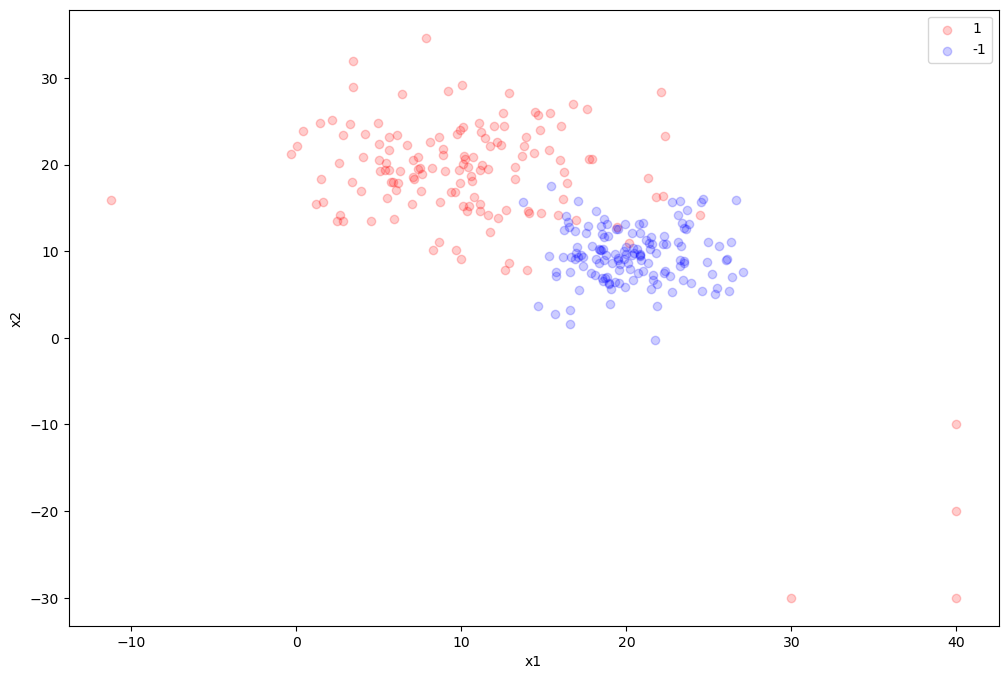

In [13]:
plt.scatter(train_data_positive.x1,train_data_positive.x2, alpha=0.2, c = p_color, label=1);
plt.scatter( train_data_negative.x1, train_data_negative.x2, alpha=0.2, c = n_color, label=-1);
plt.legend();
plt.xlabel('x1')
plt.ylabel('x2');

and on histograms

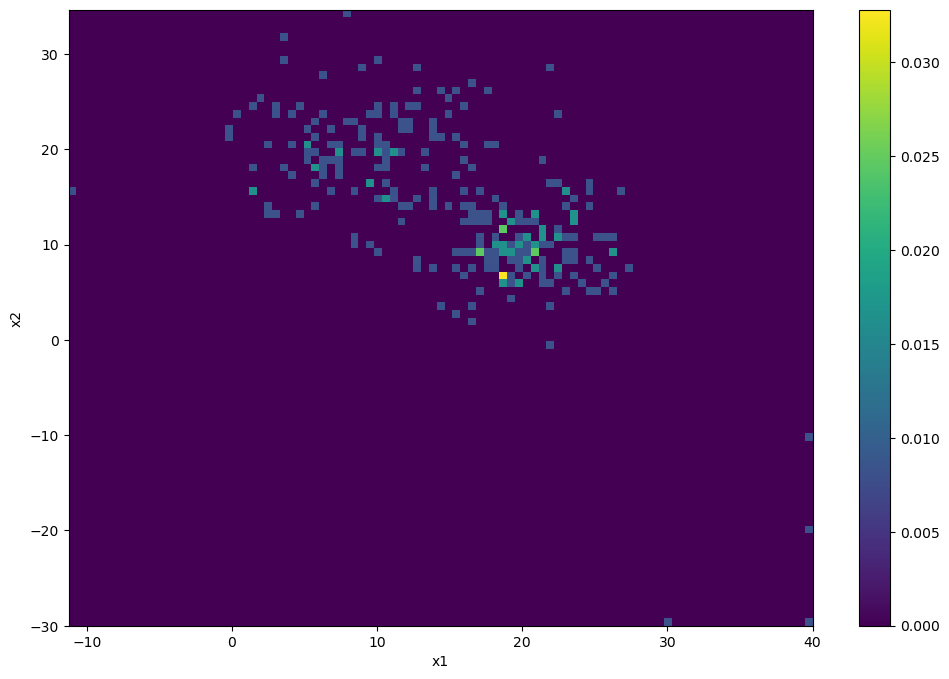

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel('x1');
ax.set_ylabel('x2');
hb = ax.hist2d(train_data['x1'], train_data['x2'], bins=[95,80], density=True);
fig.colorbar(hb[3], ax=ax);

Sometimes we can get a better looking picture with hexagonal bins:

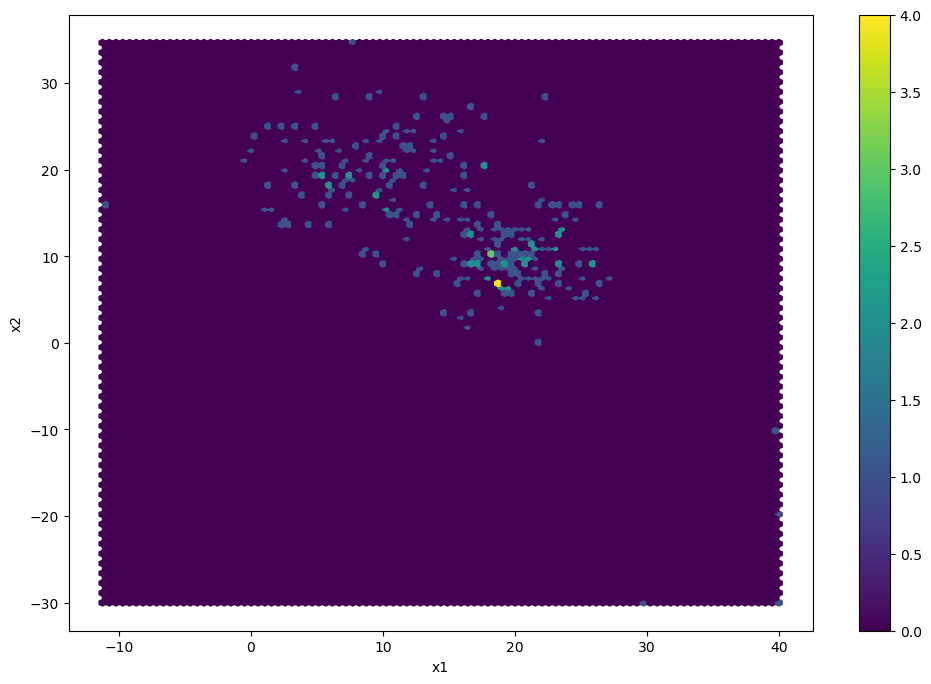

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
hb = ax.hexbin(train_data['x1'], train_data['x2']);
fig.colorbar(hb);
# ax.set_xlim(2,2.0);
# ax.set_ylim(70,120);

Because we will be using those plots often, for convenience I have wrapped them in few functions below

In [16]:
def hw_plot(**kwargs):
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    return fig,ax

def hw_scatter(fig,ax, train_data_positive, train_data_negative):
    ax.scatter(train_data_positive.x1,train_data_positive.x2, alpha=0.2, c = p_color, label=1);
    ax.scatter(train_data_negative.x1, train_data_negative.x2, alpha=0.2, c = n_color, label=-1);
    ax.legend();

def hw_hist(fig, ax, df):
    hb = ax.hist2d(train_data['x1'], train_data['x2'], bins=[100,80], density=True);
    fig.colorbar(hb[3], ax=ax);
    return hb

def hw_hexbin(fig, ax, df, **kwargs):
    hb = ax.hexbin(df['x1'], df['x2'], **kwargs);
    fig.colorbar(hb);
    return hb

In [17]:
def gaussian_stats(X):
    mu = np.mean(X,0)
    sigma = np.cov(X,rowvar=False)
    return mu, sigma

def mv_gaussian_mle_fit(X):
    mu, sigma = gaussian_stats(X)
    return st.multivariate_normal(mu, sigma)

In [18]:
import sys
sys.path.append("/mchlearn") #need to add main repo directory to the system path used for searching packages
from mchlearn.plotting import confidence_ellipse

In [19]:
mu_p, cov_p = gaussian_stats(train_data_positive[['x1', 'x2']])
mu_n, cov_n = gaussian_stats(train_data_negative[['x1', 'x2']])

By default ellipsed are drawn with a three $\sigma$ radius

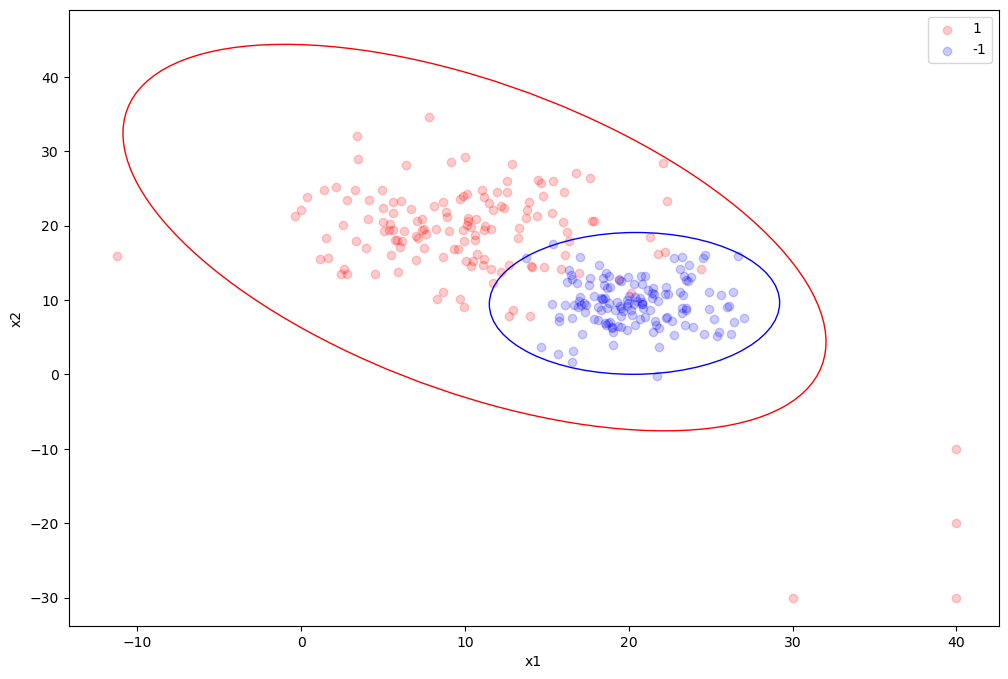

In [20]:
fig, ax = hw_plot()
hw_scatter(fig, ax, train_data_positive, train_data_negative)
confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color);

### Fitting the class priors

In [21]:
p_p = 0.5
p_n = 1- p_p

### Classification

In [22]:
dist_p = mv_gaussian_mle_fit(train_data_positive[['x1', 'x2']])
dist_n = mv_gaussian_mle_fit(train_data_negative[['x1', 'x2']])

In [23]:
def prob_F_cond_HW(hw):
    pf = dist_p.pdf(hw)*p_p
    pm = dist_n.pdf(hw)*p_n
    return pf/(pf+pm)

In [24]:
test_predicted_proba_gda = prob_F_cond_HW(test_data[['x1', 'x2']])

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [26]:
pd.DataFrame(confusion_matrix(test_data.y==1, test_predicted_proba_gda>0.5, normalize='true'))

0         1
0  0.918033  0.081967
1  0.050847  0.949153

In [27]:
pd.DataFrame({0: ['TNR', 'FPR'], 1: ['FPR','TPR']})


0    1
0  TNR  FPR
1  FPR  TPR

In [28]:
from mchlearn.plotting import roc_plot

In [29]:
def add_roc_curve(fig, ax, y_true, y_score, name):
    fprs, tprs, thds = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    ax.plot(fprs, tprs, label="{:s}  {:5.3f}".format(name, auc));
    return fprs, tprs, thds, auc

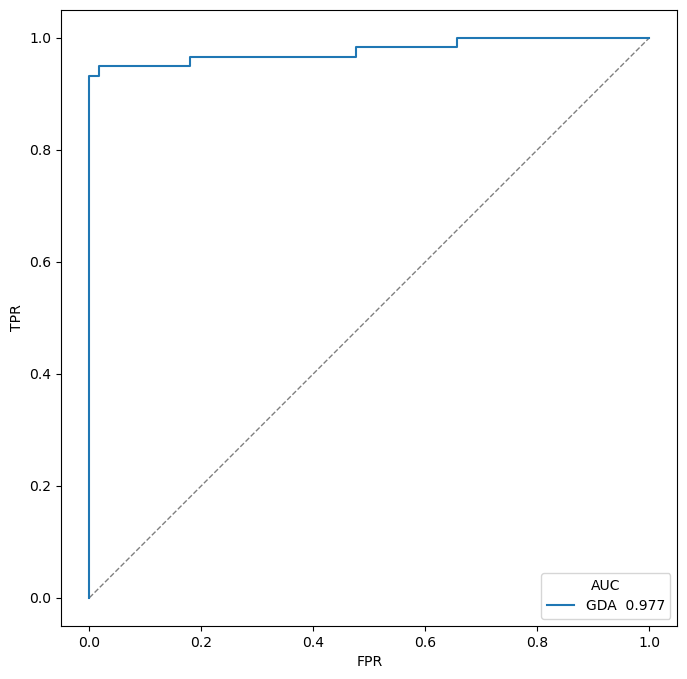

In [30]:
fig, ax = roc_plot()
add_roc_curve(fig, ax, test_data.y==1, test_predicted_proba_gda, "GDA")
ax.legend(title='AUC');

### Decision boundaries

In [31]:
from mchlearn.plotting import grid

In [32]:
minx1, maxx1 = data.iloc[:,0].min(), data.iloc[:,0].max()
minx2, maxx2 = data.iloc[:,1].min(), data.iloc[:,1].max()

In [33]:
hs = np.linspace(minx1, maxx1,100)
ws = np.linspace(minx2, maxx2,100)

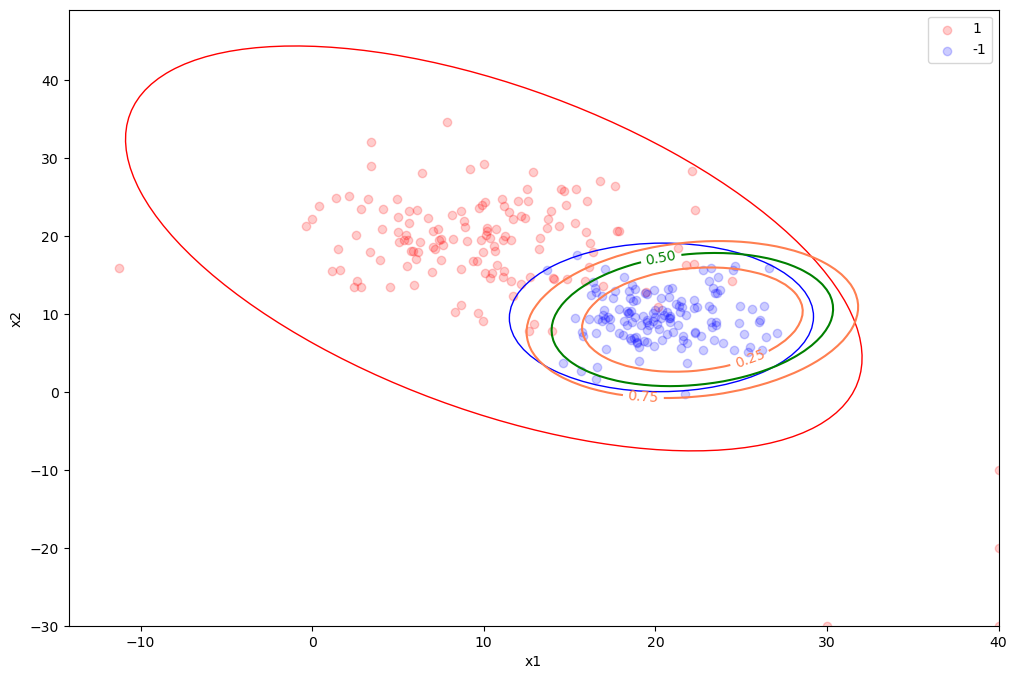

In [34]:
fig, ax = hw_plot()
hw_scatter(fig, ax, train_data_positive, train_data_negative)
confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color)
cs = ax.contour(*grid(hs,ws,prob_F_cond_HW),[0.25, 0.5, 0.75], colors=['coral','green', 'coral']);
ax.clabel(cs);

The second part of problem

In [35]:
def gaussian_stats(X):
    mu = np.mean(X,0)
    sigma = np.cov(X,rowvar=False)
    return mu, sigma



#calculalte the   likihood  draw the graph 
def mv_gaussian_mle_fit_new(X,cov_all):
    mu, sigma = gaussian_stats(X)
    return st.multivariate_normal(mu, cov_all)

def prob_F_cond_HW(hw):
    pf = dist_p.pdf(hw)*p_p
    pm = dist_n.pdf(hw)*p_n
    return pf/(pf+pm)

In [36]:
data

x1       x2  y
0    20.000 -30.0000  1
1    30.000 -30.0000  1
2    40.000 -30.0000  1
3    40.000 -20.0000  1
4    40.000 -10.0000  1
..      ...      ... ..
395  21.634   6.6954 -1
396  17.663  12.9390 -1
397  16.566   1.6164 -1
398  13.930   9.1910 -1
399  21.882   9.3220 -1

[400 rows x 3 columns]

In [37]:
dist_p = mv_gaussian_mle_fit(train_data_positive[['x1', 'x2']])
dist_n = mv_gaussian_mle_fit(train_data_negative[['x1', 'x2']])

In [38]:
mu_p,cov_p=gaussian_stats(train_data_positive[['x1', 'x2']])
mu_n,cov_n=gaussian_stats(train_data_negative[['x1', 'x2']])
mu_all,cov_all=gaussian_stats(data[['x1', 'x2']])

In [39]:
# distribution_p = mv_gaussian_mle_fit_new(train_data_positive[['x1', 'x2']],cov_all)
# distribution_n = mv_gaussian_mle_fit_new(train_data_negative[['x1', 'x2']],cov_all)

In [40]:
distribution_p = st.multivariate_normal(mu_p, cov_all)
distribution_n = st.multivariate_normal(mu_n, cov_all)

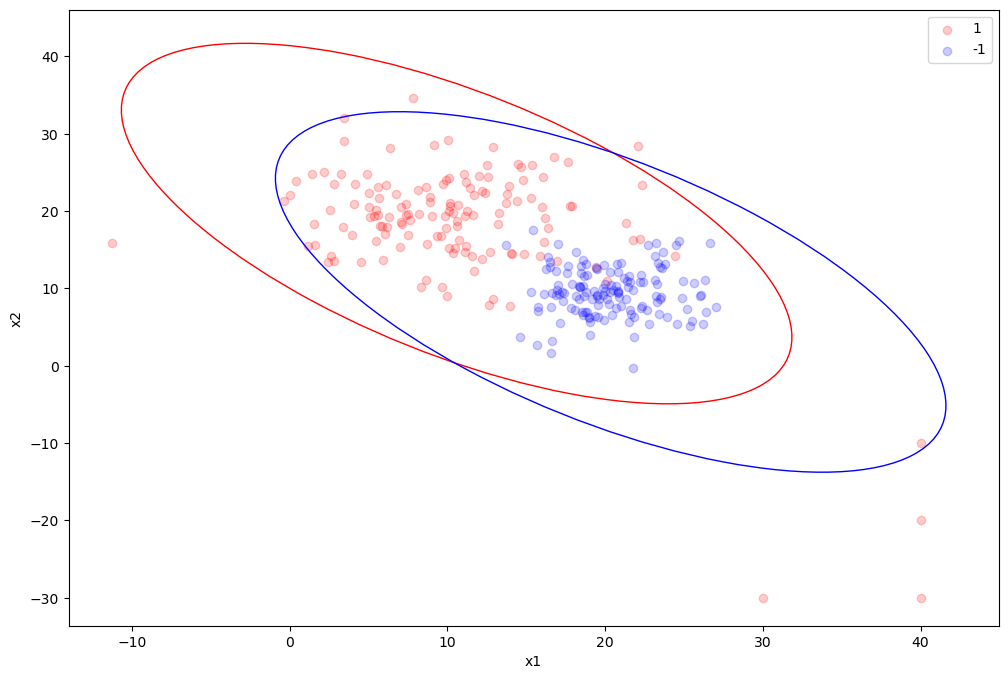

In [41]:
fig, ax = hw_plot()
hw_scatter(fig, ax, train_data_positive, train_data_negative)
confidence_ellipse(mu_p, cov_all, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_all, ax, edgecolor = n_color);

In [42]:
p_p = 0.5
p_n = 1- p_p

In [43]:
dist_p = mv_gaussian_mle_fit(train_data_positive[['x1', 'x2']])
dist_n = mv_gaussian_mle_fit(train_data_negative[['x1', 'x2']])

In [44]:
def prob_F_cond_HW(hw):
    pf = distribution_p.pdf(hw)*p_p
    pm = distribution_n.pdf(hw)*p_n
    return pf/(pf+pm)

In [45]:
test_predicted_proba_gda = prob_F_cond_HW(test_data[['x1', 'x2']])

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [47]:
pd.DataFrame(confusion_matrix(test_data.y==1, test_predicted_proba_gda>0.5, normalize='true'))

0         1
0  0.983607  0.016393
1  0.135593  0.864407

In [48]:
pd.DataFrame({0: ['TNR', 'FPR'], 1: ['FPR','TPR']})

0    1
0  TNR  FPR
1  FPR  TPR

In [49]:
from mchlearn.plotting import grid

In [50]:
minx1, maxx1 = data.iloc[:,0].min(), data.iloc[:,0].max()
minx2, maxx2 = data.iloc[:,1].min(), data.iloc[:,1].max()

In [51]:
hs = np.linspace(minx1, maxx1,100)
ws = np.linspace(minx2, maxx2,100)

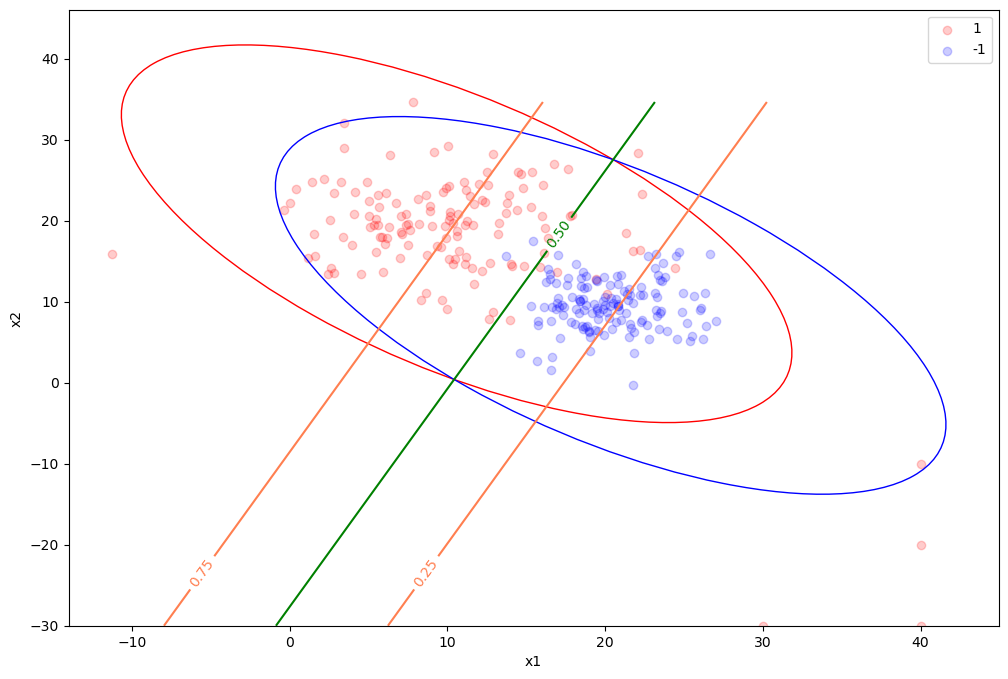

In [52]:
fig, ax = hw_plot()
hw_scatter(fig, ax, train_data_positive, train_data_negative)
confidence_ellipse(mu_p, cov_all, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_all, ax, edgecolor = n_color)
cs = ax.contour(*grid(hs,ws,prob_F_cond_HW),[0.25, 0.5, 0.75], colors=['coral','green', 'coral']);
ax.clabel(cs);

observation: here you can see that both the classes have the same variance,but different means therefore the decision boundary tends to divide the feature space equally between the two classes. also we should notice the different scale on the plot of course, i mean in the first case where the two class have different variance we have seen that the positive class (having the higher variance) dominate the feature space, while in the second case where both the classes have the same variance we have seen that the feature space is divided equally between them. aslo notice that the TP Rate decreased from 0.949153% to 0.864407%  and TN Rate increased from 0.91803% to 0.983607% because of this assumption